In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS Satyam/Projects/My Projects /Comments Dataset.csv')

In [3]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [4]:
df['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [5]:
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(31962, 3)

## Text Preprocessing
### Removing HTML Tags
### Removing Punctuations
### Lowercase
### Tokenization
### Removing Stopwords
### Stemming

In [8]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
from nltk.stem.porter import PorterStemmer
port_stem = PorterStemmer()

In [10]:
def text_preprocessing(text):
    clean_text= re.sub(re.compile('<.*?>'), '', text)
    clean_text = re.sub('[^a-zA-Z]',' ',clean_text)
    clean_text = clean_text.lower()
    clean_text = clean_text.split()
    clean_text = [port_stem.stem(word) for word in clean_text if not word in stopwords.words('english')]
    clean_text = ' '.join(clean_text)
    return clean_text

In [11]:
df['clean_text']=df['tweet'].apply(text_preprocessing)

In [12]:
df.head()

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thank lyft credit use caus offer whe...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguid societi motiv


In [13]:
df1=df[['clean_text','label']]

# EDA

In [14]:
df1.head()

,clean_text,label
0,user father dysfunct selfish drag kid dysfunct...,0
1,user user thank lyft credit use caus offer whe...,0
2,bihday majesti,0
3,model love u take u time ur,0
4,factsguid societi motiv,0


In [15]:
pip install  wordcloud

In [16]:
df1.loc[(df1['label']==1)]['clean_text'].str.cat(sep=' ')

'user cnn call michigan middl school build wall chant tcot comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin retweet agre user user lumpi say prove lumpi unbeliev st centuri need someth like neverump xenophobia user let fight love peac white establish blk folx run around love promot great user hey white peopl call peopl white user race ident med altright use amp insecur lure men whitesupremaci user interest linguist address race amp racism power raciolinguist bring user user mock obama black user user user user brexit peopl protest trump republican trump fuher amp ye call michelleobama gorilla racist long thought black peopl bet smaller hand show barri probabl lie knick game suck golf user user point one finger user million point right back jewishsupremacist might libtard libtard sjw liber polit user take trash america vote hate vote vote vot hold open door woman woman nice thing even tri deni user man ran governor ny state biggest african american popul

In [17]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [18]:
wc_img=wc.generate(df1.loc[(df1['label']==1)]['clean_text'].str.cat(sep=' '))

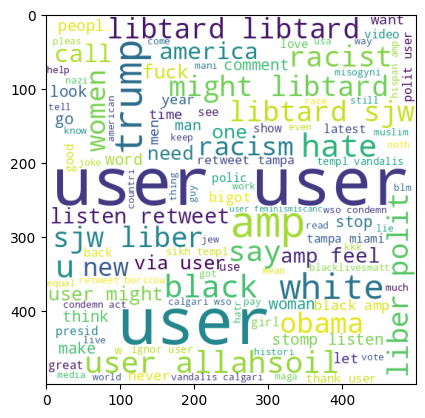

In [19]:
import matplotlib.pyplot as plt
plt.imshow(wc_img)
plt.show()

# Model Building

In [20]:
x=df1['clean_text']

In [21]:
y=df1['label']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x.shape)

(25569,)
(6393,)
(25569,)
(6393,)
(31962,)


In [25]:
print(y_train.value_counts())
print(y_test.value_counts())

0    23775
1     1794
Name: label, dtype: int64
0    5945
1     448
Name: label, dtype: int64


In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [27]:
cv=CountVectorizer()
tf= TfidfVectorizer()

In [28]:
x_train_trans=tf.fit_transform(x_train).toarray()

In [29]:
x_train_trans.shape

(25569, 27221)

In [30]:
x_test_trans=tf.transform(x_test).toarray()

In [31]:
x_test_trans.shape

(6393, 27221)

In [32]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,ConfusionMatrixDisplay,recall_score

In [33]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

0.7939934303144064
0.20661715057393654
0.6830357142857143


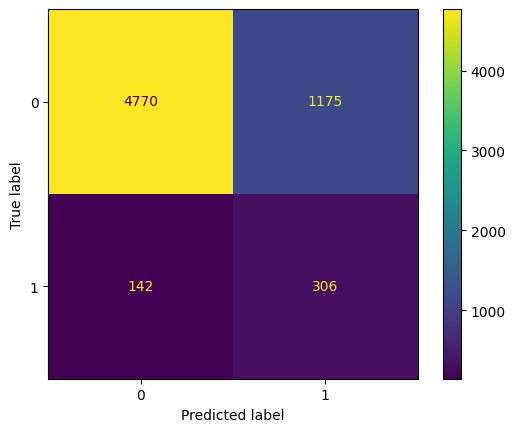

In [34]:
gnb.fit(x_train_trans,y_train)
y_pred1=gnb.predict(x_test_trans)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred1)).plot()
plt.show()

0.9402471453151885
1.0
0.14732142857142858


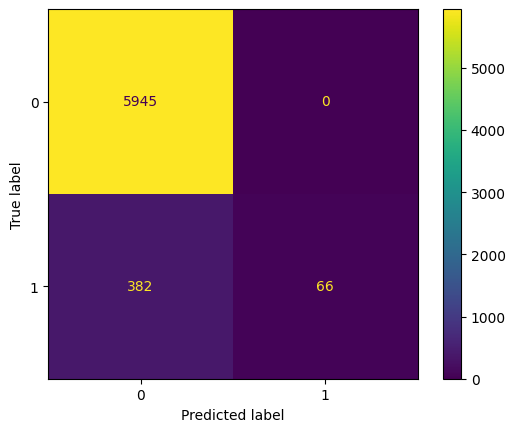

In [35]:
mnb.fit(x_train_trans,y_train)
y_pred2=mnb.predict(x_test_trans)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred2)).plot()
plt.show()

0.9465039887376818
0.9344262295081968
0.2544642857142857


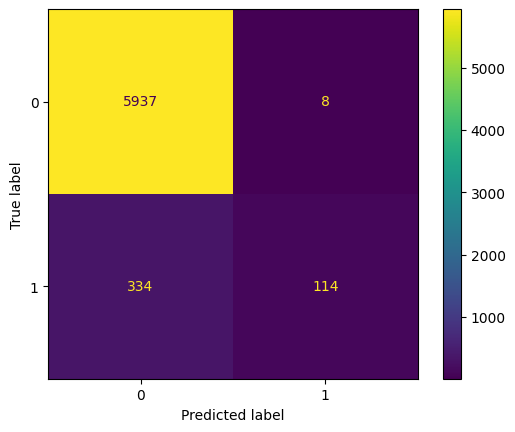

In [36]:
bnb.fit(x_train_trans,y_train)
y_pred3=bnb.predict(x_test_trans)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred3)).plot()
plt.show()